# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Logistic-Regression" data-toc-modified-id="Logistic-Regression-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Logistic Regression</a></div><div class="lev2 toc-item"><a href="#My-notes:" data-toc-modified-id="My-notes:-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>My notes:</a></div><div class="lev1 toc-item"><a href="#Load-and-Inspect-the-Data" data-toc-modified-id="Load-and-Inspect-the-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load and Inspect the Data</a></div><div class="lev2 toc-item"><a href="#Which-dimensions-to-choose-for-the-prediction?" data-toc-modified-id="Which-dimensions-to-choose-for-the-prediction?-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Which dimensions to choose for the prediction?</a></div><div class="lev1 toc-item"><a href="#Data-Preparation-(train,-test)" data-toc-modified-id="Data-Preparation-(train,-test)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Preparation (train, test)</a></div><div class="lev1 toc-item"><a href="#Manual-Implementation" data-toc-modified-id="Manual-Implementation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Manual Implementation</a></div><div class="lev2 toc-item"><a href="#Algorithm" data-toc-modified-id="Algorithm-41"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Algorithm</a></div><div class="lev2 toc-item"><a href="#Experiment" data-toc-modified-id="Experiment-42"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Experiment</a></div><div class="lev2 toc-item"><a href="#Analysis-of-parameters" data-toc-modified-id="Analysis-of-parameters-43"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Analysis of parameters</a></div><div class="lev2 toc-item"><a href="#Analysis-of-Convergence" data-toc-modified-id="Analysis-of-Convergence-44"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Analysis of Convergence</a></div><div class="lev1 toc-item"><a href="#Library-Implementations" data-toc-modified-id="Library-Implementations-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Library Implementations</a></div><div class="lev2 toc-item"><a href="#Statsmodel" data-toc-modified-id="Statsmodel-51"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Statsmodel</a></div><div class="lev2 toc-item"><a href="#SKLearn" data-toc-modified-id="SKLearn-52"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>SKLearn</a></div><div class="lev2 toc-item"><a href="#SciPy" data-toc-modified-id="SciPy-53"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>SciPy</a></div><div class="lev1 toc-item"><a href="#Sources:" data-toc-modified-id="Sources:-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Sources:</a></div><div class="lev2 toc-item"><a href="#Overviews:" data-toc-modified-id="Overviews:-61"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Overviews:</a></div><div class="lev2 toc-item"><a href="#Notebooks:" data-toc-modified-id="Notebooks:-62"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Notebooks:</a></div>

# Logistic Regression

## My notes:


# Load and Inspect the Data

For the experiments we will use the heart disease dataset (https://archive.ics.uci.edu/ml/datasets/heart+Disease)

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
df = pd.read_csv('./data/heart-disease.csv')
df['num_norm'] = df['num']
df['num_norm'] = df['num'].apply(lambda x: 1 if x>0 else 0)

# remove rows with NA values
df = df[(df['ca'] != '?') & (df['thal'] != '?')]

# transform nominal categorical columns into dummy variables
df = pd.concat([df, pd.get_dummies(df['cp'], prefix = 'cp')], axis=1)
df = pd.concat([df, pd.get_dummies(df['restecg'], prefix = 'restecg')], axis=1)
df = pd.concat([df, pd.get_dummies(df['slope'], prefix = 'slope')], axis=1)
df = pd.concat([df, pd.get_dummies(df['thal'], prefix = 'thal')], axis=1)

value_columns = list(df)
value_columns.remove('num_norm')
value_columns.remove('num')

columns = list(df)

## Which dimensions to choose for the prediction?

See [01 - LogisticRegression - MultiVariate.ipynb](01 - LogisticRegression - MultiVariate.ipynb)

In [3]:
from sklearn.linear_model import RandomizedLasso

rlasso = RandomizedLasso(alpha=0.01)
rlasso.fit(df[value_columns], df[['num_norm']].values.ravel())

stable_columns = sorted(zip(map(lambda x: round(x, 4), rlasso.scores_), columns), reverse=True)
print('The result of the RandomizedLasso:')
print(stable_columns)

print()
print('Columns with a score >0.1')
stable_columns = [x[1] for x in stable_columns if x[0] > 0.1]
print(stable_columns)

The result of the RandomizedLasso:
[(0.51500000000000001, 'cp_2.0'), (0.48999999999999999, 'ca'), (0.44, 'thal'), (0.33500000000000002, 'slope_2.0'), (0.26000000000000001, 'thalach'), (0.25, 'exang'), (0.23999999999999999, 'oldpeak'), (0.13, 'thal_3.0'), (0.13, 'cp'), (0.065000000000000002, 'restecg_1.0'), (0.01, 'slope'), (0.0050000000000000001, 'sex'), (0.0050000000000000001, 'cp_1.0'), (0.0, 'trestbps'), (0.0, 'slope_3.0'), (0.0, 'slope_1.0'), (0.0, 'restecg_2.0'), (0.0, 'restecg_0.0'), (0.0, 'restecg'), (0.0, 'num_norm'), (0.0, 'num'), (0.0, 'fbs'), (0.0, 'cp_4.0'), (0.0, 'cp_3.0'), (0.0, 'chol'), (0.0, 'age')]

Columns with a score >0.1
['cp_2.0', 'ca', 'thal', 'slope_2.0', 'thalach', 'exang', 'oldpeak', 'thal_3.0', 'cp']


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

lr = LinearRegression()
rfe = RFE(lr, n_features_to_select=1)
rfe.fit(df[value_columns], df[['num_norm']].values.ravel())

rfe_columns = sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), columns))
print(rfe_columns)
print('The result of the LinearRegression:')

print()
print('Columns with a score <5')
rfe_columns = [x[1] for x in rfe_columns if x[0] < 5]
print(rfe_columns)

[(1, 'thal_3.0'), (2, 'exang'), (3, 'restecg_1.0'), (4, 'ca'), (5, 'cp_1.0'), (6, 'cp_4.0'), (7, 'sex'), (8, 'cp'), (9, 'slope_3.0'), (10, 'cp_3.0'), (11, 'thal'), (12, 'restecg_2.0'), (13, 'oldpeak'), (14, 'fbs'), (15, 'restecg_0.0'), (16, 'restecg'), (17, 'cp_2.0'), (18, 'num_norm'), (19, 'slope_1.0'), (20, 'slope'), (21, 'num'), (22, 'trestbps'), (23, 'slope_2.0'), (24, 'thalach'), (25, 'age'), (26, 'chol')]
The result of the LinearRegression:

Columns with a score <5
['thal_3.0', 'exang', 'restecg_1.0', 'ca']


# Data Preparation (train, test)

We will do our expirements on three different subsets of the data. So we will see the impact of the choose of columns.

In [5]:
from numpy import loadtxt, zeros, ones, array, linspace, logspace, vstack

# Xs
X = df[value_columns]
X_stable= df[stable_columns]
X_rfe= df[rfe_columns]
# Y
y_norm = df["num_norm"]
y = df['num']

# number of entries
n = y.size 
# Add a column of ones to X (interception data)
it = ones(shape=(n, len(list(X))+1 ) )
it[:, 1:] = X
X = it
it = ones(shape=(n, len(list(X_stable))+1 ) )
it[:, 1:] = X_stable
X_stable = it
it = ones(shape=(n, len(list(X_rfe))+1 ) )
it[:, 1:] = X_rfe
X_rfe = it

# Create a mask for selecting randomly 20% of data
msk = np.random.rand(len(y)) < 0.2

# Split x-values for into train and test datasets
X_test = X[msk]
X = X[~msk]
X_stable_test = X_stable[msk]
X_stable = X_stable[~msk]
X_rfe_test = X_rfe[msk]
X_rfe = X_rfe[~msk]

# Split y-values for media_value into train and test data
y_test = y[msk].copy()
y = y[~msk].copy()
y_norm_test = y_norm[msk].copy()
y_norm = y_norm[~msk].copy()

# Manual Implementation

Thanks to jdwittenauer for his implementation of logistic regression. 

https://nbviewer.jupyter.org/github/jdwittenauer/ipython-notebooks/blob/master/notebooks/ml/ML-Exercise2.ipynb

## Algorithm

The sigmoid function, which represents the propability of being 0 or 1.

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

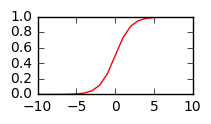

In [7]:
nums = np.arange(-10, 10, step=1)

fig, ax = plt.subplots(figsize=(2,1))
a = ax.plot(nums, sigmoid(nums), 'r')

The cost function

In [11]:
def cost(theta, X, y, regularized=False, learning_rate=1):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    if regularized:
        reg = (learning_rate / 2 * len(X)) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
        return np.sum(first - second) / (len(X)) + reg
    else:
        return np.sum(first - second) / (len(X))

Fill theta with zeros as default

In [9]:
theta = np.zeros(X.shape[1])
theta_stable= np.zeros(X_stable.shape[1])
theta_rfe = np.zeros(X_rfe.shape[1])

#theta = 0.1* np.random.randn(X.shape[1])
#theta_stable = 0.1* np.random.randn(X_stable.shape[1])
#theta_rfe = 0.1* np.random.randn(X_rfe.shape[1])

The costs for an unoptimized theta and the three different datasets.

In [12]:
print(cost(theta, X, y_norm))
print(cost(theta, X, y_norm, True))

print(cost(theta_stable, X_stable, y_norm))
print(cost(theta_stable, X_stable, y_norm, True))

print(cost(theta_rfe, X_rfe, y_norm))
print(cost(theta_rfe, X_rfe, y_norm, True))

173.28679514
173.28679514
173.28679514
173.28679514
173.28679514
173.28679514
173.28679514
173.28679514
173.28679514


The gradient descent algorithm for logistic regression

In [19]:
def gradient(theta, X, y, regularized=False, learning_rate=1):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)
    
    error = sigmoid(X * theta.T) - y
    
    for i in range(parameters):
        term = np.multiply(error, X[:,i])
        if (regularized == False or i == 0):
            grad[i] = np.sum(term) / len(X)
        else:
            grad[i] = (np.sum(term) / len(X)) + ((learning_rate / len(X)) * theta[:,i])
    
    return grad

The thetas after the first round of applying the gradient descent algorithm on the three different subsets.

In [20]:
print(gradient(theta, X, y_norm))
print(gradient(theta, X, y_norm, regularized=True))

[  5.00000000e+00   2.74280000e+02   3.44000000e+00   1.58800000e+01
   6.61860000e+02   1.23676000e+03   7.40000000e-01   4.82000000e+00
   7.48100000e+02   1.66000000e+00   5.38200000e+00   8.02000000e+00
   3.52000000e+00   2.41600000e+01   3.60000000e-01   8.20000000e-01
   1.40000000e+00   2.42000000e+00   2.56000000e+00   6.00000000e-02
   2.38000000e+00   2.32000000e+00   2.34000000e+00   3.40000000e-01
   2.62000000e+00   3.60000000e-01   2.02000000e+00]
[  5.00000000e+00   2.74280000e+02   3.44000000e+00   1.58800000e+01
   6.61860000e+02   1.23676000e+03   7.40000000e-01   4.82000000e+00
   7.48100000e+02   1.66000000e+00   5.38200000e+00   8.02000000e+00
   3.52000000e+00   2.41600000e+01   3.60000000e-01   8.20000000e-01
   1.40000000e+00   2.42000000e+00   2.56000000e+00   6.00000000e-02
   2.38000000e+00   2.32000000e+00   2.34000000e+00   3.40000000e-01
   2.62000000e+00   3.60000000e-01   2.02000000e+00]


In [22]:
print(gradient(theta_stable, X_stable, y_norm))
print(gradient(theta_stable, X_stable, y_norm, regularized=True))

[   5.       0.82     3.52    24.16     2.34   748.1      1.66     5.382
    2.62    15.88 ]
[   5.       0.82     3.52    24.16     2.34   748.1      1.66     5.382
    2.62    15.88 ]


In [23]:
print(gradient(theta_rfe, X_rfe, y_norm))
print(gradient(theta_rfe, X_rfe, y_norm, regularized=True))

[ 5.    2.62  1.66  0.06  3.52]
[ 5.    2.62  1.66  0.06  3.52]


## Experiment


For the optimization we will use optimization algorithms of scipy.

One can choose between different optimization algorithms.

Be aware: when using fmin_tnc the result is an array of arrays, so use result[0], when using fmin_bfgs use result.

In [26]:
import scipy.optimize as opt

In [24]:
regularized = True
learning_rate = 1

In [29]:
#result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y_norm))
result = opt.fmin_bfgs(cost, theta, fprime=gradient, args=(X, y_norm, regularized, learning_rate))
print(result)
print(cost(result, X, y_norm, regularized, learning_rate))

         Current function value: 173.088274
         Iterations: 5
         Function evaluations: 44
         Gradient evaluations: 33
[ -1.18096505e-04  -3.44994773e-04  -1.72879490e-04  -6.64984326e-04
  -1.05470462e-04  -2.20705087e-05   5.74895762e-05   1.28137491e-04
  -2.09161720e-04  -1.56558667e-04  -2.47523970e-04  -3.25374787e-04
   2.46408804e-05  -7.08928577e-04   5.55944651e-05   9.49008967e-06
   6.83536740e-06  -1.90016268e-04  -1.78646257e-04  -7.03766940e-06
   6.75875802e-05   9.14448843e-05  -2.11804019e-04   2.26278877e-06
  -1.84577989e-05  -4.39146488e-05  -5.57238982e-05]
173.088274498


In [30]:
#result_stable = opt.fmin_tnc(func=cost, x0=theta_stable, fprime=gradient, args=(X_stable, y_norm))
result_stable = opt.fmin_bfgs(cost, theta_stable, fprime=gradient, args=(X_stable, y_norm, regularized, learning_rate))
print(result_stable)
print(cost(result_stable, X_stable , y_norm, regularized, learning_rate))

         Current function value: 173.090659
         Iterations: 3
         Function evaluations: 68
         Gradient evaluations: 57
[ -2.49332787e-04   2.35102867e-06  -3.18916244e-04  -6.02470062e-04
  -3.93752809e-04  -4.49009453e-04  -2.23535585e-04  -4.60311800e-04
  -2.68279794e-04  -9.75456474e-04]
173.090658704


In [31]:
#result_rfe = opt.fmin_tnc(func=cost, x0=theta_rfe, fprime=gradient, args=(X_rfe, y_norm))
result_rfe = opt.fmin_bfgs(cost, theta_rfe, fprime=gradient, args=(X_rfe, y_norm, regularized, learning_rate))

print(result_rfe)
print(cost(result_rfe, X_rfe , y_norm, regularized, learning_rate))

Optimization terminated successfully.
         Current function value: 173.086742
         Iterations: 9
         Function evaluations: 16
         Gradient evaluations: 16
[ -8.00426541e-02  -1.15220689e-07   1.51750002e-07  -8.27338971e-07
  -4.54580599e-08]
173.086741773


In [35]:
def predict(theta, X):
    probability = sigmoid(X * theta.T)
    return [1 if x >= 0.5 else 0 for x in probability]

In [36]:
def accuracy(theta, X, y):
    theta_min = np.matrix(theta)
    predictions = predict(theta_min, X)
    correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
    accuracy = (sum(map(int, correct)) % len(correct))
    print(theta_min)
    print('\taccuracy = {0}%'.format(accuracy))
    print('\tMAE: ', metrics.mean_absolute_error(y, predictions))
    print('\tMSE: ', metrics.mean_squared_error(y, predictions))
    print('\tRMSE: ', np.sqrt(metrics.mean_squared_error(y, predictions)))
    print()

In [333]:
accuracy(result, X_test, y_norm_test)
accuracy(result_stable, X_stable_test, y_norm_test)
accuracy(result_rfe, X_rfe_test, y_norm_test)


[[ -9.37973281e-03  -2.06479388e-12  -7.02091099e-10  -3.90822182e-03
    8.35503697e-13  -1.98984736e-12  -5.30877864e-10  -3.12657753e-03
    5.63498516e-12   4.37301478e-10   9.98572210e-11  -6.25315556e-03
    2.23439513e-10  -5.17502487e-03  -8.20726717e-03  -4.29904307e-03
   -3.90821801e-04   3.51739922e-03  -6.25315312e-03  -3.12658186e-03
    2.16656013e-09  -9.37973304e-03  -3.12657679e-03   3.12657702e-03
   -1.52016361e-02   3.23439592e-04   5.49846370e-03]]
	accuracy = 34%
	MAE:  0.37037037037
	MSE:  0.37037037037
	RMSE:  0.60858061945

[[ -7.41080028e-02  -5.08273319e-10   4.47159535e-09  -1.39680865e-10
    2.47864750e-09  -2.23257567e-11  -3.28825641e-10  -6.23697358e-09
    1.70780461e-08   1.20084818e-09]]
	accuracy = 34%
	MAE:  0.37037037037
	MSE:  0.37037037037
	RMSE:  0.60858061945

[[ -7.41079539e-02   1.77519375e-08   1.64187546e-08  -7.19493387e-08
    1.83461308e-08]]
	accuracy = 34%
	MAE:  0.37037037037
	MSE:  0.37037037037
	RMSE:  0.60858061945



## Analysis of parameters

## Analysis of Convergence

# Library Implementations

## Statsmodel

In [41]:
from statsmodels.discrete.discrete_model import Logit
from patsy import dmatrices
import statsmodels.discrete.discrete_model as sm

In [43]:
logit = sm.Logit(y_norm, X)
fit = logit.fit_regularized(method='l1')

#print('Intercept + Coefficients: ', fit.params)
#print('P-Values: ', fit.pvalues)
#print('Conf. Interval: ', fit.conf_int())

print('')
print(cost(fit.params, X , y_norm))
accuracy(fit.params, X, y_norm)
accuracy(fit.params, X_test, y_norm_test)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.324837595542
            Iterations: 101
            Function evaluations: 113
            Gradient evaluations: 101

375.420768397
[[-0.84062973 -0.02214585  1.75765078  0.06457658  0.03249216  0.0031433
  -0.88166603 -0.09067774 -0.01604277  0.60542375  0.38779565 -0.48795636
   1.55443697 -0.36073846 -1.19355398  0.40376121 -0.68058341  0.9228331
  -0.81988611 -0.13691485  0.0795973  -1.28224555  0.37994929  0.17380751
  -1.54053958 -0.4881691   1.37089333]]
	accuracy = 221%
	MAE:  0.116
	MSE:  0.116
	RMSE:  0.340587727319

[[-0.84062973 -0.02214585  1.75765078  0.06457658  0.03249216  0.0031433
  -0.88166603 -0.09067774 -0.01604277  0.60542375  0.38779565 -0.48795636
   1.55443697 -0.36073846 -1.19355398  0.40376121 -0.68058341  0.9228331
  -0.81988611 -0.13691485  0.0795973  -1.28224555  0.37994929  0.17380751
  -1.54053958 -0.4881691   1.37089333]]
	accuracy = 42%
	MAE:  0.106382978723
	M

In [44]:
logit = sm.Logit(y_norm, X_stable)
fit = logit.fit_regularized(method='l1')

#print('Intercept + Coefficients: ', fit.params)
#print('P-Values: ', fit.pvalues)
#print('Conf. Interval: ', fit.conf_int())

print('')
print(cost(fit.params, X_stable , y_norm))
accuracy(fit.params, X_stable, y_norm)
accuracy(fit.params, X_stable_test, y_norm_test)


Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.376469892924
            Iterations: 62
            Function evaluations: 66
            Gradient evaluations: 62

315.617591008
[[ -1.06665852e+01   9.20137567e-01   1.17984837e+00   1.27079276e+00
    7.68490462e-01  -8.36192745e-03   7.76653610e-01   5.58849145e-01
    3.08768695e+00   6.58286803e-01]]
	accuracy = 211%
	MAE:  0.156
	MSE:  0.156
	RMSE:  0.394968353163

[[ -1.06665852e+01   9.20137567e-01   1.17984837e+00   1.27079276e+00
    7.68490462e-01  -8.36192745e-03   7.76653610e-01   5.58849145e-01
    3.08768695e+00   6.58286803e-01]]
	accuracy = 42%
	MAE:  0.106382978723
	MSE:  0.106382978723
	RMSE:  0.326164036527



In [45]:
logit = sm.Logit(y_norm, X_rfe)
fit = logit.fit_regularized(method='l1')

#print('Intercept + Coefficients: ', fit.params)
#print('P-Values: ', fit.pvalues)
#print('Conf. Interval: ', fit.conf_int())

print('')
print(cost(fit.params, X_rfe , y_norm))
accuracy(fit.params, X_rfe, y_norm)
accuracy(fit.params, X_rfe_test, y_norm_test)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.430968405179
            Iterations: 35
            Function evaluations: 35
            Gradient evaluations: 35

273.282490615
[[-0.25236233 -2.06557009  1.43219918  0.15075648  1.20273334]]
	accuracy = 205%
	MAE:  0.18
	MSE:  0.18
	RMSE:  0.424264068712

[[-0.25236233 -2.06557009  1.43219918  0.15075648  1.20273334]]
	accuracy = 40%
	MAE:  0.148936170213
	MSE:  0.148936170213
	RMSE:  0.385922492494



## SKLearn

In [33]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score

/home/apospiech/Programme/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [37]:
model = LogisticRegression(penalty='l2', C=1.0)

fit = model.fit(X.astype('float'), y)

#print('Coefficients a1, a2: ', fit.coef_)
#print('Intercept a0: ', fit.intercept_)
#print('R-Squared: ',fit.score(X_test, y_test))

print('')
print(cost(fit.coef_[4], X , y_norm))
accuracy(fit.coef_[4], X, y_norm)
accuracy(fit.coef_[4], X_test, y_norm_test)


458.843960612
[[-0.28042899  0.00388133  0.67266106 -0.14023342 -0.0075521  -0.00776169
  -0.42133289  0.29430421 -0.00603242 -0.1628245   0.20971573  0.14356666
   0.5522471  -0.03157603  0.07277823 -0.42179075 -0.35623571  0.42481925
  -0.63307247  0.41098276 -0.05833927 -0.59824974  0.21164585  0.1061749
  -0.49515719  0.04920188  0.16552632]]
	accuracy = 131%
	MAE:  0.476
	MSE:  0.476
	RMSE:  0.689927532426

[[-0.28042899  0.00388133  0.67266106 -0.14023342 -0.0075521  -0.00776169
  -0.42133289  0.29430421 -0.00603242 -0.1628245   0.20971573  0.14356666
   0.5522471  -0.03157603  0.07277823 -0.42179075 -0.35623571  0.42481925
  -0.63307247  0.41098276 -0.05833927 -0.59824974  0.21164585  0.1061749
  -0.49515719  0.04920188  0.16552632]]
	accuracy = 30%
	MAE:  0.36170212766
	MSE:  0.36170212766
	RMSE:  0.601416767026



In [38]:
model = LogisticRegression(penalty='l2', C=1.0)

fit = model.fit(X_stable.astype('float'), y)

#print('Coefficients a1, a2: ', fit.coef_)
#print('Intercept a0: ', fit.intercept_)
#print('R-Squared: ',fit.score(X_test, y_test))

print('')
print(cost(fit.coef_[4], X_stable , y_norm))
accuracy(fit.coef_[4], X_stable, y_norm)
accuracy(fit.coef_[4], X_stable_test, y_norm_test)


394.58608353
[[-0.43802304 -0.53815517  0.49048699 -0.06004878  0.32681596 -0.01593966
  -0.080908    0.36411915 -0.83792275 -0.10848884]]
	accuracy = 132%
	MAE:  0.472
	MSE:  0.472
	RMSE:  0.687022561493

[[-0.43802304 -0.53815517  0.49048699 -0.06004878  0.32681596 -0.01593966
  -0.080908    0.36411915 -0.83792275 -0.10848884]]
	accuracy = 30%
	MAE:  0.36170212766
	MSE:  0.36170212766
	RMSE:  0.601416767026



In [39]:
model = LogisticRegression(penalty='l2', C=1.0)

fit = model.fit(X_rfe, y)

print('Coefficients a1, a2: ', fit.coef_)
#print('Intercept a0: ', fit.intercept_)
#print('R-Squared: ',fit.score(X_test, y_test))

print('')
print(cost(fit.coef_[4], X_rfe , y_norm))
accuracy(fit.coef_[4], X_rfe, y_norm)
accuracy(fit.coef_[4], X_rfe_test, y_norm_test)

Coefficients a1, a2:  [[ 0.12807423  1.85778541 -1.26769392 -0.03302522 -1.12282545]
 [-0.58969506 -0.56918995  0.36207895 -0.42036728 -0.14151754]
 [-1.14977823 -1.24322425  0.62814076 -0.45463305  0.57282815]
 [-1.16331325 -1.41687772  0.60215368  0.22764883  0.62961401]
 [-1.51086885 -1.07734909  0.04828364  0.54518447  0.53733416]]

256.624011159
[[-1.51086885 -1.07734909  0.04828364  0.54518447  0.53733416]]
	accuracy = 139%
	MAE:  0.444
	MSE:  0.444
	RMSE:  0.666333249958

[[-1.51086885 -1.07734909  0.04828364  0.54518447  0.53733416]]
	accuracy = 31%
	MAE:  0.340425531915
	MSE:  0.340425531915
	RMSE:  0.583459965992



## SciPy

see Manual Implementation

# Sources:

## Overviews:

http://wiki.fast.ai/index.php/Logistic_Regression

http://www.holehouse.org/mlclass/06_Logistic_Regression.html

https://www.cs.cmu.edu/~ninamf/courses/601sp15/lectures.shtml

https://aimotion.blogspot.de/2011/11/machine-learning-with-python-logistic.html

## Notebooks:

https://github.com/stephengo/heart-disease-model/blob/master/LogRegression.ipynb

https://github.com/LucDemortier/HeartDiseaseStudy/blob/master/HeartDiseaseProject.ipynb

https://nbviewer.jupyter.org/github/jdwittenauer/ipython-notebooks/blob/master/notebooks/ml/ML-Exercise2.ipynb

https://gist.github.com/vietjtnguyen/6655020 - for the manual part